# Install the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis
import cdlib

# Import the country relationships file

In [5]:
relationship_df = pd.read_csv('country_relationship.csv', index_col = 0)

In [6]:
relationship_df

,source,target,value
0,France,Russia,12
1,Germany,Russia,26
2,Bulgaria,Germany,6
3,Bulgaria,Russia,6
4,Germany,Italy,26
...,...,...,...
89,Germany,United States,1
90,Philippines,United States,6
91,Romania,Russia,6
92,China,Lebanon,3


# Create a network object

In [7]:
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

# Create a static network graph 

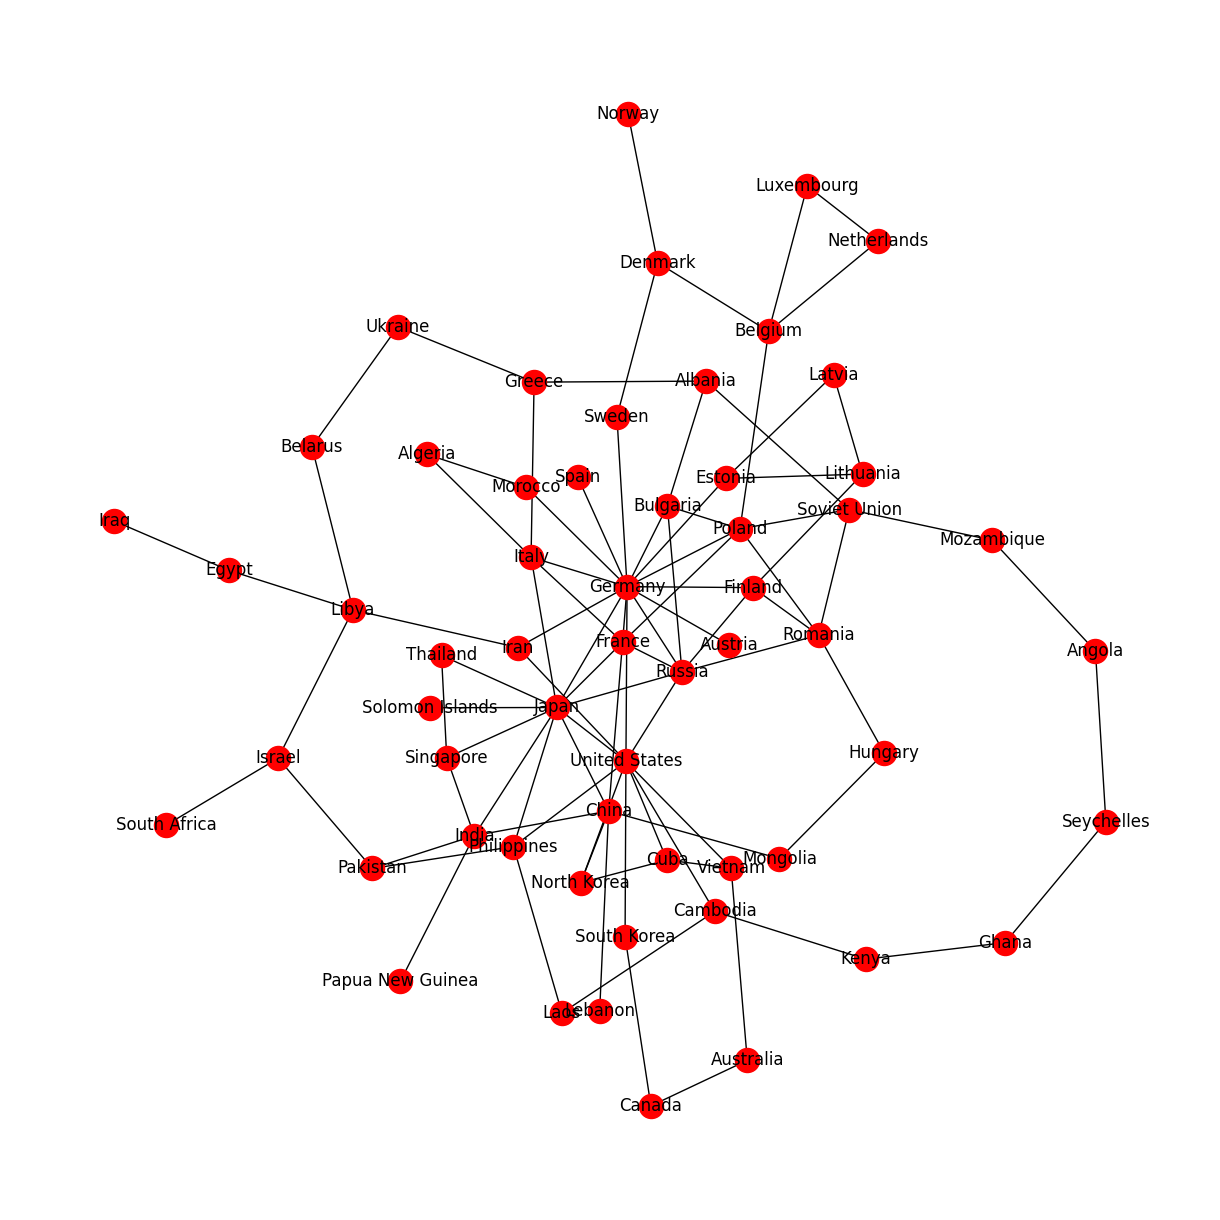

In [10]:
h = plt.figure(figsize = (12,12))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [11]:
h.savefig('networkx_plt_country.png')

# Switch to pyvis

In [14]:
# Define net object
net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')
# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("country_relationship_network.html")

country_relationship_network.html


# Apply the Leiden algorithm to detect any communities

In [18]:
from cdlib import algorithms

In [22]:
coms = algorithms.leiden(G)

In [23]:
new_com = coms.to_node_community_map()

In [24]:
dict_com = {k:v[0] for k,v in new_com.items()}

In [25]:
dict_com

{'France': 0,
 'Russia': 0,
 'Germany': 0,
 'Bulgaria': 0,
 'Austria': 0,
 'Spain': 0,
 'Poland': 0,
 'Soviet Union': 0,
 'Finland': 0,
 'Albania': 0,
 'Romania': 0,
 'Japan': 1,
 'China': 1,
 'Thailand': 1,
 'Singapore': 1,
 'Solomon Islands': 1,
 'India': 1,
 'Papua New Guinea': 1,
 'Hungary': 1,
 'Mongolia': 1,
 'Lebanon': 1,
 'Philippines': 2,
 'United States': 2,
 'Laos': 2,
 'Cambodia': 2,
 'North Korea': 2,
 'Cuba': 2,
 'South Korea': 2,
 'Canada': 2,
 'Australia': 2,
 'Vietnam': 2,
 'Libya': 3,
 'Egypt': 3,
 'Iraq': 3,
 'Pakistan': 3,
 'Israel': 3,
 'South Africa': 3,
 'Iran': 3,
 'Belgium': 4,
 'Netherlands': 4,
 'Luxembourg': 4,
 'Denmark': 4,
 'Norway': 4,
 'Sweden': 4,
 'Italy': 5,
 'Greece': 5,
 'Ukraine': 5,
 'Belarus': 5,
 'Morocco': 5,
 'Algeria': 5,
 'Kenya': 6,
 'Ghana': 6,
 'Seychelles': 6,
 'Angola': 6,
 'Mozambique': 6,
 'Estonia': 7,
 'Latvia': 7,
 'Lithuania': 7}

# Visualize the output of the communities algorithm

In [26]:
nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("country_communities_leiden.html")

country_communities_leiden.html


Through analysis, we can see that the algorithm has divided the countries into eight communities, with three communities standing out significantly. These three communities, when viewed in the context of historical events, are:

A community of countries centered around Germany, linked by the European theater of World War II.

A community of countries centered around Japan, linked by the Asian theater of World War II.

A community of countries centered around the United States, linked by disputes or shared interests with the United States.

The different communities are also connected through specific countries, including:

Two communities linked through Japan, connecting with Germany and Russia.

Two communities linked through Japan, connecting with the United States and the Philippines.

Two communities linked through the United States, connecting with Iran.

# Calculate and visualize the degree, closeness, and betweenness

In [27]:
degree_dict = nx.degree_centrality(G)

In [28]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['country','centrality'])

In [29]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

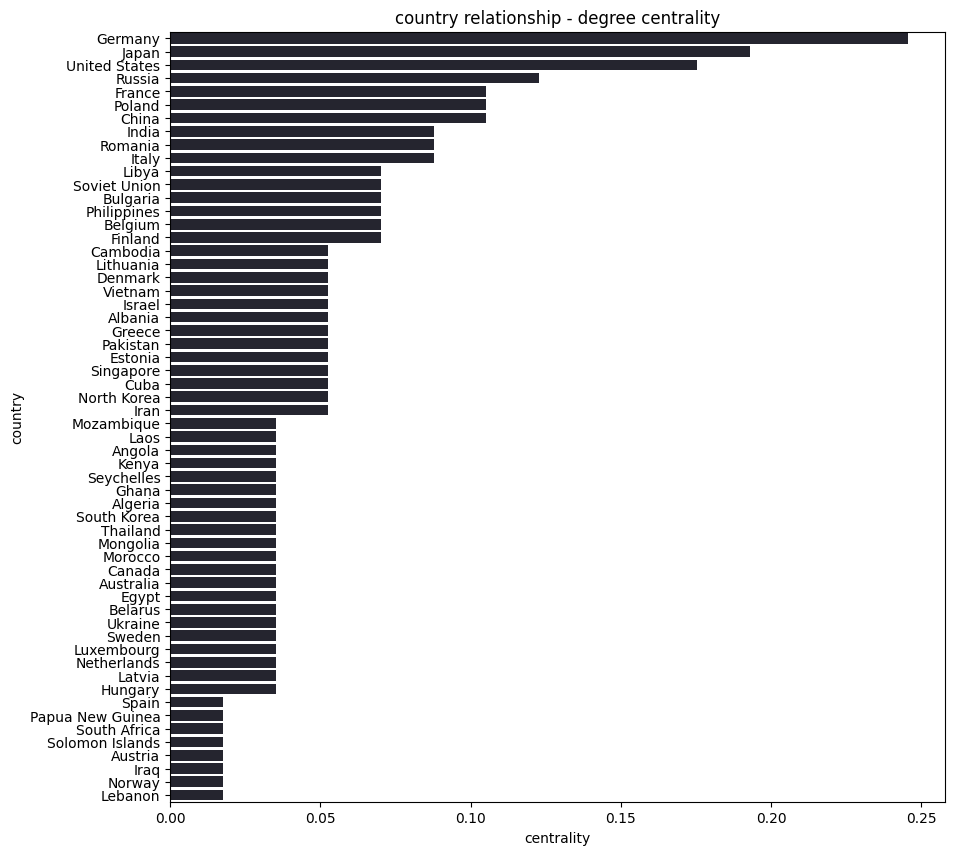

In [35]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = degree_df).set_title("country relationship - degree centrality")

In [36]:
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['country','centrality'])

In [37]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

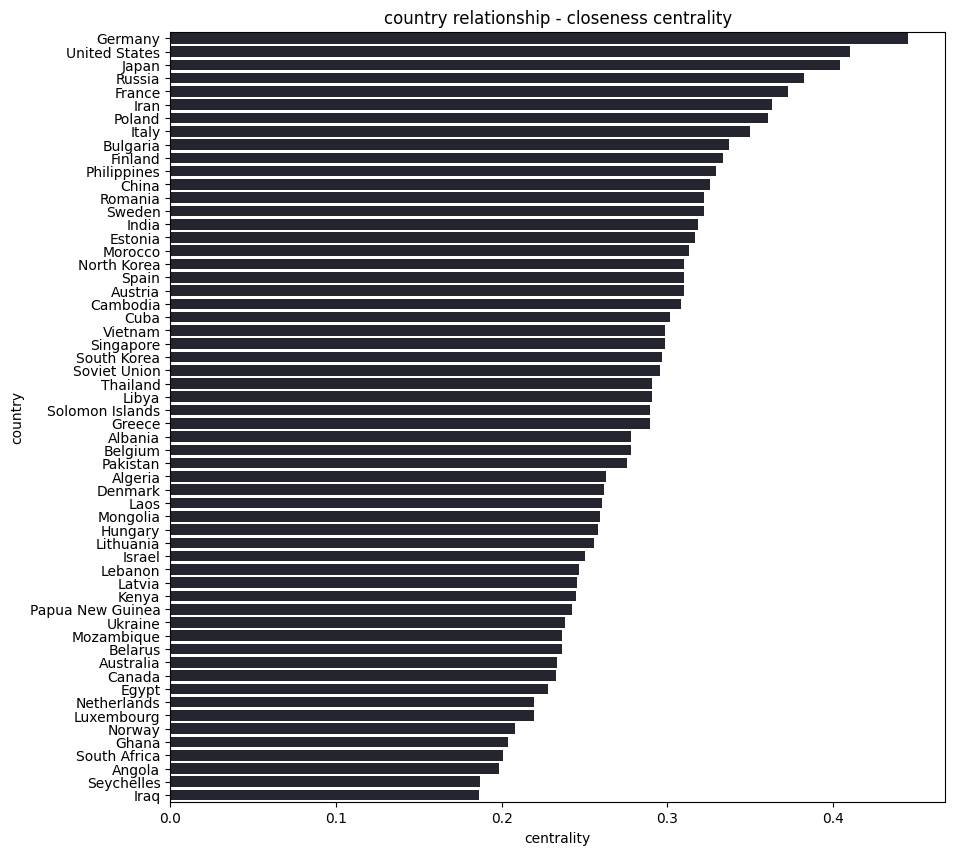

In [39]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = closeness_df).set_title("country relationship - closeness centrality")

In [40]:
betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['country','centrality'])

In [41]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

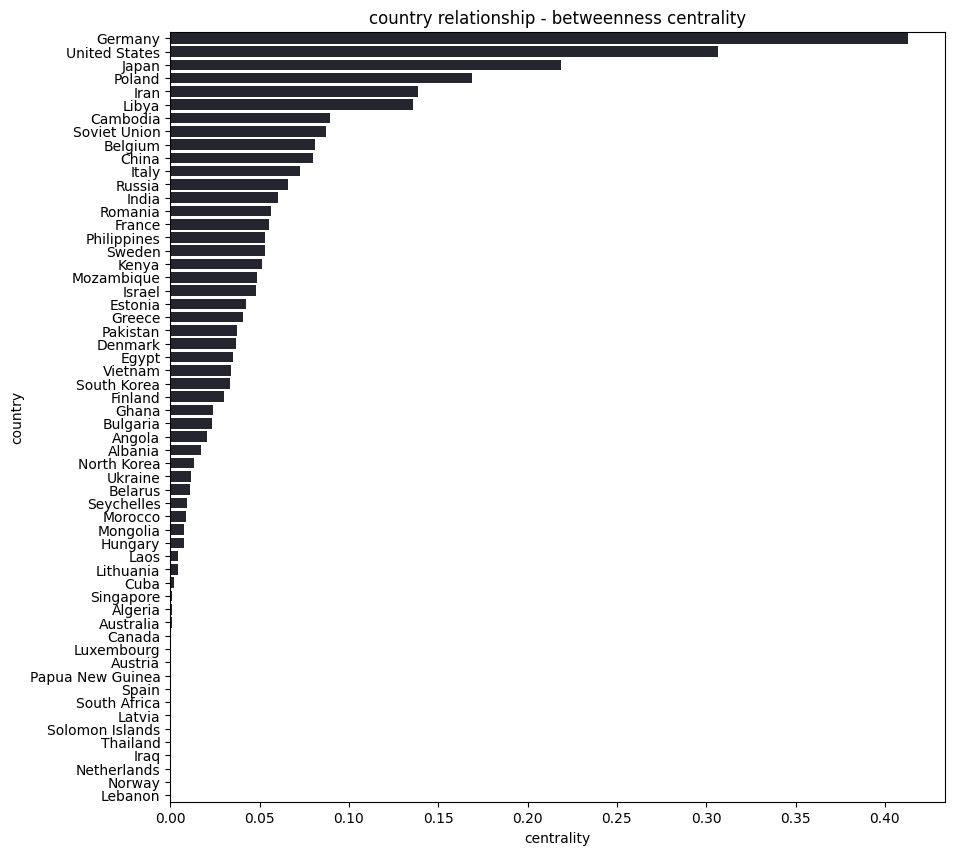

In [42]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = betweennes_df).set_title("country relationship - betweenness centrality")